In [4]:
import time

import pandas as pd
#import semanticscholar as sch
#from tqdm.notebook import tqdm

SLEEP = 1
TIMEOUT = 10

#papers_df = pd.read_json('../data/papers_FOCS_ICML_NIPS_STOC_2000_2009.json')
#tcs_papers_df = papers_df[papers_df['community'] == 'TCS'].set_index('doi')


#paper_results = {}
#for doi in tqdm(missing_doi):
#    paper = sch.paper(doi, timeout=TIMEOUT)
#    if not paper:
#        print(doi)
#    paper_results[doi] = paper
#    time.sleep(SLEEP)
    
#sch_tcs_papers_df = pd.DataFrame.from_dict(paper_results, orient='index')   

#papers_df = pd.merge(papers_df,
#                     sch_tcs_papers_df.add_suffix('_sch'),
#                     how='left', left_on='doi', right_index=True)
#papers_df.to_json('../data/papers_FOCS_ICML_NIPS_STOC_2000_2009_with_sch.json')

In [522]:
papers_df.columns

Index(['authors', 'title', 'venue', 'pages', 'year', 'key', 'doi', 'ee', 'url',
       'publisher', 'authors_dblp', 'stand_authors', 'is_alphabetical',
       'n_author', 'conf', 'community', 'volume', 'abstract_sch',
       'arxivId_sch', 'authors_sch', 'citationVelocity_sch', 'citations_sch',
       'corpusId_sch', 'doi_sch', 'fieldsOfStudy_sch',
       'influentialCitationCount_sch', 'is_open_access_sch',
       'is_publisher_licensed_sch', 'paperId_sch', 'references_sch',
       'title_sch', 'topics_sch', 'url_sch', 'venue_sch', 'year_sch'],
      dtype='object')

In [120]:
len(papers_df[(~papers_df['authors_sch'].isna())])

1516

In [121]:
papers_df.groupby('conf')['paperId_sch'].apply(lambda g: g.isna().mean())

conf
FOCS    0.001439
ICML    1.000000
NIPS    1.000000
STOC    0.000000
Name: paperId_sch, dtype: float64

In [122]:
papers_df[(papers_df['conf'] == 'FOCS') & papers_df['paperId_sch'].isna()]

,authors,title,venue,pages,year,key,doi,ee,url,publisher,...,influentialCitationCount_sch,is_open_access_sch,is_publisher_licensed_sch,paperId_sch,references_sch,title_sch,topics_sch,url_sch,venue_sch,year_sch
610,[Mihai Patrascu],Succincter.,FOCS,305-313,2008,conf/focs/Patrascu08,10.1109/FOCS.2008.83,https://doi.org/10.1109/FOCS.2008.83,https://dblp.org/rec/conf/focs/Patrascu08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
all_authors = set.union(*papers_df[~papers_df['paperId_sch'].isna()]['authors_sch'].apply(lambda authors: {author['authorId']
                                                                                  for author in authors}))

In [80]:
#author_results = {}

In [166]:
# for author_id in tqdm(all_authors - set(author_results.keys())):
#    author = sch.author(author_id, timeout=TIMEOUT)
#    if not author:
#        print(author_id)
#    else:
#        author_results[author_id] = author
#    time.sleep(SLEEP)


None



In [520]:
#with open('../data/authors_FOCS_ICML_NIPS_STOC_2000_2009_with_sch.pckl', 'wb') as f:
#    pickle.dump(author_results, f)

In [43]:
import pickle

authors_df = pd.read_json('../data/authors_FOCS_ICML_NIPS_STOC_2000_2009.json')
with open('../data/authors_FOCS_ICML_NIPS_STOC_2000_2009_with_sch.pckl', 'rb') as f:
    author_results = pickle.load(f)

In [76]:
import string
import numpy as np

papers_df['author_letter_int'] = papers_df['stand_authors'].apply(lambda r: [string.ascii_uppercase.index(a[0]) for a in r])
papers_df['avg_author_letter_int'] = papers_df['author_letter_int'].apply(np.mean)


In [576]:
(papers_df[(papers_df['community'] == 'TCS') & (papers_df['is_alphabetical'])]
 .groupby('n_author')['avg_author_letter_int']).mean()

n_author
1    11.327434
2    11.308989
3    10.968606
4    11.164634
5    10.353191
6    10.712121
7    12.571429
8     9.968750
Name: avg_author_letter_int, dtype: float64

In [565]:
(papers_df[(papers_df['community'] == 'TCS') & (papers_df['is_alphabetical'])]
 .groupby('n_author').size())

n_author
1    339
2    534
3    361
4    164
5     47
6     22
7      2
8      4
dtype: int64

In [ ]:
q= (papers_df[(papers_df['community'] == 'TCS') & (papers_df['is_alphabetical'])]
 .groupby('n_author').size())

In [71]:
papers_df['is_sing'] = (papers_df['n_author'] == 1)

In [95]:
is_sing_letter_dist = (papers_df[(papers_df['community'] == 'TCS') & (papers_df['is_alphabetical'])]
 .groupby('is_sing')
 ['author_letter_int']
 .apply(lambda g: sum(g, [])))

In [92]:
from scipy.stats import ks_2samp
import seaborn as sns

In [97]:
ks_2samp(is_sing_letter_dist[True], is_sing_letter_dist[False])

KstestResult(statistic=0.056455779695487276, pvalue=0.2708782851313566)

In [10]:
len(set(sch_tcs_authors_df.index))

NameError: name 'sch_tcs_authors_df' is not defined

In [44]:
papers_df = pd.read_json('../data/papers_FOCS_ICML_NIPS_STOC_2000_2009_with_sch.json')

In [46]:
def unify_sch_author_by_dblp(author_group):
    return pd.Series({'aliases': list(set.union(*map(set, author_group['aliases']))),
                      'authorId': list(author_group['authorId']),
                      'influentialCitationCount': sum(a for a in author_group['influentialCitationCount']),
                      'papers': sum(author_group['papers'], []),
                      'name': list(set(author_group['name'])),
                      'url': list(author_group['authorId'])})


authors_sch2dblp = {}
for _, paper in papers_df[~papers_df['authors_sch'].isna()].iterrows():
    authors_sch2dblp.update(dict(zip((author['authorId'] for author in paper['authors_sch']),
                                     paper['authors'])))
sch_tcs_authors_df = pd.DataFrame.from_dict(author_results, orient='index')
sch_tcs_authors_df['dblp_name'] = pd.Series(authors_sch2dblp)
assert (sch_tcs_authors_df.index == sch_tcs_authors_df['authorId']).all()
sch_tcs_authors_df = sch_tcs_authors_df.set_index('dblp_name')


sch_tcs_authors_df = pd.DataFrame.from_dict(author_results, orient='index')
sch_tcs_authors_df['dblp_name'] = pd.Series(authors_sch2dblp)

sch_tcs_authors_df = sch_tcs_authors_df.groupby('dblp_name').apply(unify_sch_author_by_dblp)
sch_tcs_authors_df['n_pub'] = sch_tcs_authors_df['papers'].apply(len)
sch_tcs_authors_df['scientific_birth_year'] = sch_tcs_authors_df['papers'].apply(lambda r: min(p['year'] for p in r if p['year']))
sch_tcs_authors_df['scientific_age'] = 2021 - sch_tcs_authors_df['scientific_birth_year']

sch_tcs_authors_df['annual_productiviy'] = sch_tcs_authors_df['n_pub'] / sch_tcs_authors_df['scientific_birth_year']

authors_df = pd.merge(authors_df,
             sch_tcs_authors_df.add_suffix('_sch'),
             how='left', left_index=True, right_index=True)

In [48]:
authors_df.columns

Index(['stand_name', 'confs', 'communities', 'community', 'community_ratio',
       'major_community', 'multi', 'real_name', 'papers_authors', 'coauthors',
       'n_pub', 'n_coauthor', 'stand_coauthors', 'avg_is_sort', 'only_sing',
       'coauthors_letter', 'positions', 'first_prop', 'last_prop', 'letter',
       'letter_int', 'letter_val', 'status', 'affiliation', 'citedby',
       'citedby5y', 'cites_per_year', 'email', 'hindex', 'hindex5y',
       'i10index', 'i10index5y', 'id', 'interests', 'url_picture',
       'scientific_age', 'annual_productivity', 'real_last_prop',
       'avg_coauthor', 'aliases_sch', 'authorId_sch',
       'influentialCitationCount_sch', 'papers_sch', 'name_sch', 'url_sch',
       'n_pub_sch', 'scientific_birth_year_sch', 'scientific_age_sch',
       'annual_productiviy_sch'],
      dtype='object')

In [1]:
from nameparser import HumanName
from ethnicolr import census_ln, pred_census_ln, pred_wiki_name, pred_wiki_ln

Using TensorFlow backend.


In [45]:
authors_df.columns

Index(['stand_name', 'confs', 'communities', 'community', 'community_ratio',
       'major_community', 'multi', 'real_name', 'papers_authors', 'coauthors',
       'n_pub', 'n_coauthor', 'stand_coauthors', 'avg_is_sort', 'only_sing',
       'coauthors_letter', 'positions', 'first_prop', 'last_prop', 'letter',
       'letter_int', 'letter_val', 'status', 'affiliation', 'citedby',
       'citedby5y', 'cites_per_year', 'email', 'hindex', 'hindex5y',
       'i10index', 'i10index5y', 'id', 'interests', 'url_picture',
       'scientific_age', 'annual_productivity', 'real_last_prop',
       'avg_coauthor'],
      dtype='object')

In [49]:
#TODO MAIN

authors_df = pd.merge(authors_df, authors_df['real_name'].apply(lambda r: HumanName(r)).apply(lambda name: pd.Series({'first_name': name.first,
                                                                           'middle_name': name.middle,
                                                                           'last_name': name.last})),
             how='left', left_index=True, right_index=True)

In [50]:
authors_df = pred_wiki_name(authors_df, 'last_name', 'first_name')
authors_df['race_main'] = authors_df['race'].str.split(',').str[0]

In [51]:
authors_df['race_main'].value_counts()

GreaterEuropean    3677
Asian              1540
GreaterAfrican      205
Name: race_main, dtype: int64

In [524]:
import string

In [545]:
q['coauthors_letter_int'] = q['coauthors_letter'].apply(lambda r: [string.ascii_uppercase.index(letter) for letter in r])

In [546]:
qq = q[(q['community'] == 'TCS') & ~q['only_sing']]

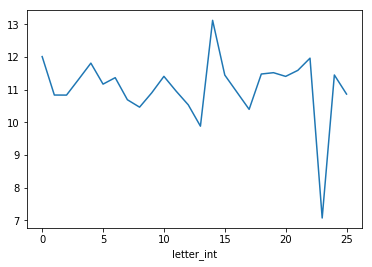

In [553]:
qq.groupby('letter_int').apply(lambda g: (g['coauthors_letter_int'].apply(np.mean)).mean()).plot()

In [62]:
import gender_guesser.detector as gender

gender_detector = gender.Detector()

In [67]:
authors_df['perhaps_gender'] = authors_df['first_name'].apply(gender_detector.get_gender)

In [68]:
authors_df['perhaps_gender'].value_counts()

male             3513
unknown           963
female            453
andy              290
mostly_male       156
mostly_female      47
Name: perhaps_gender, dtype: int64

In [22]:
pred_wiki_name?

In [447]:
from scipy import stats

In [457]:
stats.pearsonr(sch_tcs_authors_df['scientific_age'], sch_tcs_authors_df['n_pub'])

(0.33298852279428587, 3.275011256650299e-35)

In [455]:
sch_tcs_authors_df['scientific_age']

dblp_name
Aaron Archer              25
Aaron Bernstein           37
Aaron Clauset             18
Aaron Cote                26
Aaron Roth 0001           89
                          ..
Zulfikar Ramzan           23
Zvi Lotker                22
Ákos Seress               38
Éric Colin de Verdière    20
Éva Tardos                39
Name: scientific_age, Length: 1307, dtype: int64

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [389]:
q['community'].value_counts()

ML      4100
TCS     1241
BOTH      81
Name: community, dtype: int64

In [475]:
q['influentialCitationCount_sch'].median()


209.0

In [70]:
(smf.ols('influentialCitationCount_sch ~ letter_int + scientific_age_sch + race_main + perhaps_gender', data=authors_df[(authors_df['community'] == 'TCS')
                                                                               & (authors_df['influentialCitationCount_sch'] >= 200)])
 .fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     influentialCitationCount_sch   R-squared:                       0.036
Model:                                      OLS   Adj. R-squared:                  0.022
Method:                           Least Squares   F-statistic:                     2.522
Date:                          Tue, 08 Dec 2020   Prob (F-statistic):            0.00767
Time:                                  10:07:52   Log-Likelihood:                -5076.7
No. Observations:                           611   AIC:                         1.017e+04
Df Residuals:                               601   BIC:                         1.022e+04
Df Model:                                     9                                         
Covariance Type:                      nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         266.7900    275.300      0.969      0.333    -273.878     807.458
race_main[T.GreaterAfrican]      -146.7667    201.935     -0.727      0.468    -543.350     249.816
race_main[T.GreaterEuropean]      -55.0004    114.344     -0.481      0.631    -279.563     169.563
perhaps_gender[T.female]           32.9426    289.804      0.114      0.910    -536.209     602.094
perhaps_gender[T.male]             80.4945    259.841      0.310      0.757    -429.812     590.801
perhaps_gender[T.mostly_female]   372.2443    427.710      0.870      0.384    -467.744    1212.233
perhaps_gender[T.mostly_male]     -20.9818    325.270     -0.065      0.949    -659.786     617.823
perhaps_gender[T.unknown]         -57.5879    266.233     -0.216      0.829    -580.448     465.272
letter_int                          3.5253      5.762      0.612      0.541      -7.791      14.842
scientific_age_sch                 14.4426      3.407      4.239      0.000       7.751      21.134
==============================================================================
Omnibus:                      603.816   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22005.693
Skew:                           4.535   Prob(JB):                         0.00
Kurtosis:                      30.966   Cond. No.                         599.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
(smf.ols('hindex ~ letter_int + scientific_age + race_main', data=authors_df[(authors_df['community'] == 'ML')
                                                                                ])
                                                                               #& (authors_df['influentialCitationCount_sch'] >= 200)])
 .fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 hindex   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     161.3
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          2.66e-124
Time:                        10:02:43   Log-Likelihood:                -13090.
No. Observations:                2780   AIC:                         2.619e+04
Df Residuals:                    2775   BIC:                         2.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        2.3725      1.961      1.210      0.226      -1.472       6.217
race_main[T.GreaterAfrican]     -7.6846      2.868     -2.679      0.007     -13.309      -2.060
race_main[T.GreaterEuropean]    -6.1884      1.127     -5.492      0.000      -8.398      -3.979
letter_int                       0.2196      0.072      3.054      0.002       0.079       0.361
scientific_age                   1.8391      0.074     24.939      0.000       1.694       1.984
==============================================================================
Omnibus:                     1129.401   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5798.263
Skew:                           1.887   Prob(JB):                         0.00
Kurtosis:                       8.985   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [421]:
import numpy as np

In [30]:
(smf.ols('influentialCitationCount_sch ~  scinetific_age_sch + race_main', data=q[(q['community'] == 'TCS')
                                                                               & (q['n_pub_sch'] >= 0)])
 .fit().summary())

NameError: name 'smf' is not defined

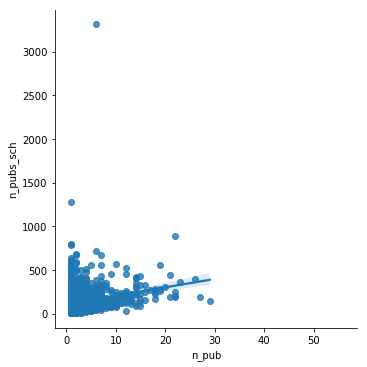

In [430]:
mask= q['n_pubs_sch'].isna()
sns.lmplot(x='n_pub', y='n_pubs_sch', data=q)

In [426]:
sns.lmplot(q['n_pub'], q['n_pubs_sch'])

/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: 'NoneType' object is not subscriptable

In [404]:
(smf.ols('influentialCitationCount_sch ~ letter_val + scientific_age', data=q[(q['community'] == 'TCS')
                                                                               & (q['n_pubs_sch'] >= 100)])
 .fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     influentialCitationCount_sch   R-squared:                       0.020
Model:                                      OLS   Adj. R-squared:                  0.016
Method:                           Least Squares   F-statistic:                     4.769
Date:                          Mon, 07 Dec 2020   Prob (F-statistic):            0.00891
Time:                                  21:41:05   Log-Likelihood:                -3922.1
No. Observations:                           473   AIC:                             7850.
Df Residuals:                               470   BIC:                             7863.
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        200.1598    179.608      1.114      0.266    -152.774     553.094
letter_val       196.8299    156.221      1.260      0.208    -110.147     503.807
scientific_age    17.5422      6.047      2.901      0.004       5.660      29.424
==============================================================================
Omnibus:                      435.688   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11519.479
Skew:                           4.050   Prob(JB):                         0.00
Kurtosis:                      25.779   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/shlomi/.pyenv/versions/3.8.3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


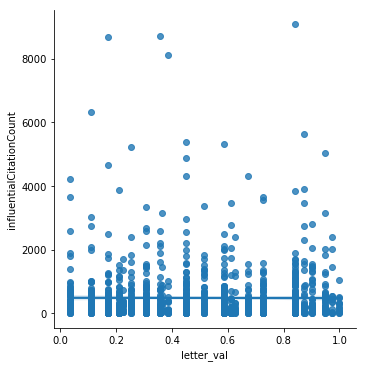

In [333]:
sns.lmplot('letter_val', 'influentialCitationCount', data=q)

In [299]:
len(all_authors)

1335

,aliases
dblp_name,
Aaron Archer,"[Aaron Archer, A Archer, Aaron K Archer]"
Aaron Bernstein,"[Aaron C Bernstein, A. Bernstein, Aaron Bernst..."
Aaron Clauset,"[A. Clauset, Aaron Clauset, Aaron J Clauset, A..."
Aaron Cote,"[Aaron S. Côté, Aaron Coté, Aaron Daniel Cote,..."
Aaron Roth 0001,"[Aaron Roth, Aaron Lyle Roth, A. L. Roth, A. R..."
...,...
Zulfikar Ramzan,[Zulfikar Amin Ramzan]
Zvi Lotker,[]
Ákos Seress,[Ákos Attila Seress]
